# II. Data Understanding

## 1. Initial Data Collection
- <h3>Data Source</h3>
The data was downloaded from <a href='https://www.kaggle.com/christophercorrea/dc-residential-properties'>Kaggle</a>. All data is available at <a href='http://opendata.dc.gov/'>Open Data D.C.</a>. The residential and address point data is managed by the <a href='https://octo.dc.gov/'>Office of the Chief Technology Officer</a>.
- <h3>Data Access & Data Privacy</h3>
Distribution Liability: <a href='http://dc.gov/page/terms-and-conditions-use-district-data'>Data Terms and Conditions</a>


## 2. Data Description
- <h3>Number of Records</h3>
    
    - Rows : 158957

    - Columns : 49 

- <h3>Field Identities</h3>

  - **#Unnamed: 0** : Index
  - **BATHRM** : Number of Full Bathroom
  - **HF_BATHRM** : Number of Half Bathroom
  - **HEAT** : Heating System
  - **AC** : Air Conditioning (Cooling) Availability
  - **NUM_UNITS** : Number of Units
  - **ROOMS** : Number of Rooms in the Property
  - **BEDRM** : Number of Bedrooms
  - **AYB** : The earliest time the main portion of the building was built
  - **YR_RMDL** : Year structure was remodeled
  - **EYB** : The year an improvement was built more recent than actual year built
  - **STORIES** : Number of Stories
  - **SALEDATE** : Date of Most Recent Sale
  - **PRICE** : Price of Most Recent Sale
  - **QUALIFIED**$^1$ : Government’s Criteria on whether the sale is representative of market value
  - **SALE_NUM** : Number of Sales Since 2014
  - **GBA** : Gross Building Area (in sqr feet)
  - **BLDG_NUM** : Building number on property
  - **STYLE** : Style
  - **STRUCT** : Structure
  - **GRADE** : Grade 
  - **CNDTN** : Condition
  - **EXTWALL** : Exterior wall
  - **ROOF** : Roof type
  - **INTWALL** : Interior wall
  - **KITCHENS** : Number of kitchens
  - **FIREPLACES** : Number of fireplaces
  - **USECODE** : Property use code
  - **LANDAREA** : Land area of property in sqr feet
  - **GIS_LAST_MOD_DTTM** : Last modified date
  - **SOURCE** : Raw data source
  - **CMPLX_NUM** : Complex number
  - **LIVING_GBA** : Gross building area in square feet
  - **FULLADDRESS** : Full Street Address
  - **CITY** : City
  - **STATE** : State
  - **ZIPCODE** : Zip Code
  - **NATIONALGRID**$^2$ : Address location national grid coordinate spatial address
  - **LATITUDE** : Latitude
  - **LONGITUDE** : Longitude
  - **ASSESSMENT_NBHD** : Neighborhood ID
  - **ASSESSMENT_SUBNBHD** : Subneighborhood ID
  - **CENSUS_TRACT** : Census tract
  - **CENSUS_BLOCK** : Census block
  - **WARD** : Ward (District is divided into eight wards, each with approximately 75,000 residents)
  - **SQUARE** : Square (from SSL) *SSL = Square, Suffix, Lot
  - **X** : longitude
  - **Y** : latitude
  - **QUADRANT** : City quadrant (NE, SE, SW, NW)


## 3. Exploratory Data Analysis

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium.features import DivIcon
from sklearn.model_selection import train_test_split

In [270]:
df_properties = pd.read_csv('../Data/DC_Properties.csv')
pd.set_option('max_columns',100)
df_properties.head()

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [271]:
df_properties.shape

(158957, 49)

##### The df_properties contains data from 2 different data sources, (i.e., 'Condominium' and 'Residential'). There is different information availability from these 2 data sources. Thus, we decide to separate the data and use only the data from 'Residential'.

In [272]:
df_properties['SOURCE'].unique()

array(['Residential', 'Condominium'], dtype=object)

In [273]:
df_residential = df_properties[df_properties['SOURCE'] == 'Residential'].copy()
df_residential.reset_index(drop=True, inplace=True)

In [274]:
df_residential.shape

(106696, 49)

In [275]:
df_residential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106696 entries, 0 to 106695
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          106696 non-null  int64  
 1   BATHRM              106696 non-null  int64  
 2   HF_BATHRM           106696 non-null  int64  
 3   HEAT                106696 non-null  object 
 4   AC                  106696 non-null  object 
 5   NUM_UNITS           106696 non-null  float64
 6   ROOMS               106696 non-null  int64  
 7   BEDRM               106696 non-null  int64  
 8   AYB                 106455 non-null  float64
 9   YR_RMDL             49279 non-null   float64
 10  EYB                 106696 non-null  int64  
 11  STORIES             106652 non-null  float64
 12  SALEDATE            84183 non-null   object 
 13  PRICE               57900 non-null   float64
 14  QUALIFIED           106696 non-null  object 
 15  SALE_NUM            106696 non-nul

##### We drop data with empty `PRICE` because to build a regression model we need the label `PRICE` to fit the model in the training process and to evaluate the model performance in the validation and testing phase.  

In [276]:
df_residential.dropna(subset=['PRICE'], axis=0, inplace=True)
df_residential.reset_index(drop=True, inplace=True)

### Data Pre-Processing

#### Transforming Data Types

We transform the data type of the following column(s):
- `SALEDATE` from object into DATETIME type

In [277]:
df_residential['SALEDATE'] = pd.to_datetime(df_residential['SALEDATE'])

#### Drop Unused Columns

We decide to drop or ignore the following columns :
- `Unnamed: 0` as it is just an index column.
- `SALE_NUM`, based on the information from the dataset owner :
>The `SALE_NUM` column actually does not represent the number of times a property has been sold. The `SALE_NUM` field appears to be an artifact of an older appraisal database, and shouldn't be used in any analysis. However, the `SALE_NUM` has been incremented since May 2014 and should reflect the number of sales since then.
- `CMPLX_NUM` and `LIVING_GBA` as they have no values (the columns were originally Condominium's). 
- `X` and `Y` as they are the same as `Longitude` and `Latitude` columns. We will use `Longitude` and `Latitude` because they do not contain missing values as `X` and `Y` do.
- `ASSESSMENT_SUBNBHD` as there is already `ASSESSMENT_NBHD` column which is represantative enough of the information.
- `SOURCE` is no longer needed as the identifier as we already separated the Residential data from the Condominium data.
- `CITY` (has only 1 value: 'WASHINGTON') and `STATE` (has only 1 value: 'DC').
- `NATIONALGRID`, `GIS_LAST_MOD_DTTM`, `CENSUS_BLOCK` we assume the information of location from these column can be represented by `LONGITUDE` and `LATITUDE`. Thus, they will most likely not be used in the data analysis process or in the modelling.

In [278]:
df_residential.drop(columns=['Unnamed: 0', 'SALE_NUM', 'CMPLX_NUM', 'LIVING_GBA',
                             'X', 'Y', 'ASSESSMENT_SUBNBHD', 'SOURCE', 'CITY',
                             'STATE', 'NATIONALGRID','GIS_LAST_MOD_DTTM', 'CENSUS_BLOCK'], axis=1, inplace=True)

- `YR_RMDL` as about 42% of the data in this column are missing values.

In [279]:
# Checking percentage of missing values in YR_RMDL
df_residential[df_residential['YR_RMDL'].isna()]['YR_RMDL'].shape[0]/df_residential.shape[0]*100

42.630397236614854

In [280]:
# Dropping YR_RMDL column
df_residential.drop(columns=['YR_RMDL'], axis=1, inplace=True)

- We assume that `STORIES` column represents the number of floors in a building, and the values in this dataset are erroneous (i.e., there are some buildings that have the number of floors equal to 250 or more). Thus, we drop this column and since `STYLE` column contains similar information as `STORIES` and is even more well-defined, we will use it instead.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


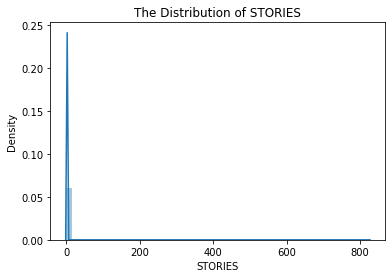

In [281]:
sns.distplot(df_residential['STORIES'])
plt.title('The Distribution of STORIES')
plt.show()

In [282]:
df_residential['STYLE'].unique()

array(['3 Story', '4 Story', '2 Story', '2.5 Story Fin', '3.5 Story Fin',
       '1 Story', '1.5 Story Fin', '2.5 Story Unfin', 'Default',
       '3.5 Story Unfin', '1.5 Story Unfin', 'Split Level', 'Split Foyer',
       'Bi-Level', 'Vacant', '4.5 Story Fin', 'Outbuildings',
       '4.5 Story Unfin'], dtype=object)

In [283]:
df_residential.drop(columns=['STORIES'], axis=1, inplace=True)

- We will drop the `FULLADDRESS` column later after using it to fill the missing values in `QUADRANT`. We do not use it in the analysis or modeling process because they can be represented by `LONGITUDE` and `LATITUDE`.

#### Excluding Exceptional Properties

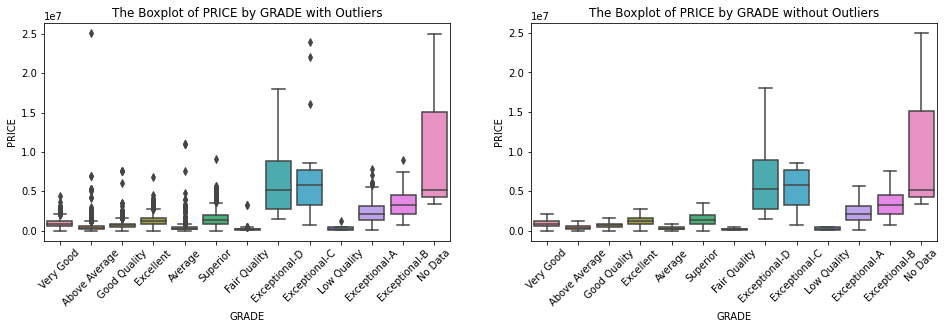

In [284]:
# Price value based on their grade
fig, ax = plt.subplots(1,2,figsize=(16,4))

sns.boxplot(data=df_residential, x='GRADE', y='PRICE', ax=ax[0])
sns.boxplot(data=df_residential, x='GRADE', y='PRICE', showfliers=False, ax=ax[1])

ax[0].set_title('The Boxplot of PRICE by GRADE with Outliers')
ax[1].set_title('The Boxplot of PRICE by GRADE without Outliers')
ax[0].xaxis.set_tick_params(rotation=45)
ax[1].xaxis.set_tick_params(rotation=45)
plt.show()

In [285]:
# The number of Exceptional properties 
count_exceptional_properties = df_residential[((df_residential['GRADE']=='Exceptional-A')|
                 (df_residential['GRADE']=='Exceptional-B') | 
                 (df_residential['GRADE']=='Exceptional-C') | 
                 (df_residential['GRADE']=='Exceptional-D'))].shape[0]

print('The number of Exceptional GRADE properties in our data is {}'.format(count_exceptional_properties))

The number of Exceptional GRADE properties in our data is 717


As we can see from the analysis above, properties with 'Exceptional' grade have very different prices compared with the rest of other grades. They are very high in prices but their occurrence in our data is very small (i.e., 717 data).

Considering the limitation of our time budget, we limit the capability of our model in this project to predict an output only for properties with grade lower than Exceptional or price under the upper bound. Exceptional properties have a price range that is very different than the rest of other grades and another model needs to be built specifically for them.

In [286]:
# Drop Exceptional GRADE
df_residential.drop( df_residential[((df_residential['GRADE']=='Exceptional-A')|
                 (df_residential['GRADE']=='Exceptional-B') | 
                 (df_residential['GRADE']=='Exceptional-C') | 
                 (df_residential['GRADE']=='Exceptional-D'))].index, inplace=True)

#### Train Test Split

We split the development (training & validation) & test set before performing EDA and only perform EDA on development set in order to avoid information leak from the test set which is supposed to be unknown instances.

In [287]:
X = df_residential.drop(columns='PRICE', axis=1)
y = df_residential['PRICE']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
# 80% dev set (train + validation)
# 20% test set

In [288]:
# Concat X & y
df_dev = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [289]:
# Reset index
df_dev.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

In [290]:
df_dev.shape

(45746, 34)

In [291]:
df_test.shape

(11437, 34)

In [292]:
df_dev.isna().sum()

BATHRM               0
HF_BATHRM            0
HEAT                 0
AC                   0
NUM_UNITS            0
ROOMS                0
BEDRM                0
AYB                 76
EYB                  0
SALEDATE             1
QUALIFIED            0
GBA                  0
BLDG_NUM             0
STYLE                0
STRUCT               0
GRADE                0
CNDTN                0
EXTWALL              0
ROOF                 0
INTWALL              0
KITCHENS             1
FIREPLACES           0
USECODE              0
LANDAREA             0
FULLADDRESS        251
ZIPCODE              0
LATITUDE             0
LONGITUDE            0
ASSESSMENT_NBHD      0
CENSUS_TRACT         0
WARD                 0
SQUARE               0
QUADRANT            87
PRICE                0
dtype: int64

#### Fill Missing Values

We decide to replace data with missing values in the following columns:
- `AYB` to be filled with the median as the distribution of the data is left-skewed. After checking our data condition to see if it makes sense to replace the missing values with median, we conclude that it is possible. The median of `AYB` is 1929, and among the data with missing values in `AYB`, all of their `EYB` values are after 1929. We will use the year information later on as it is an important factor that can contribute to a property's value$^3$.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Distribution of AYB')

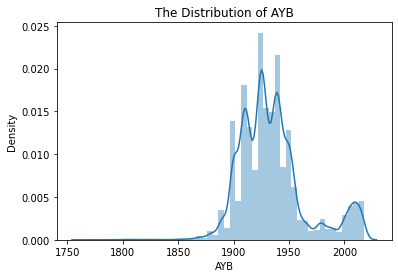

In [293]:
# Checking the distribution of the data
sns.distplot(df_dev['AYB'])
plt.title('The Distribution of AYB')

In [294]:
print('The earliest EYB in all of the dataset is: {}'.format(df_dev['EYB'].min()))
print('The median of AYB is: {}'.format(df_dev['AYB'].median()))
print('The values of EYB in AYB with missing values are: {}'.format(sorted(df_dev[(df_dev['AYB'].isna())]['EYB'].unique())))

The earliest EYB in all of the dataset is: 1915
The median of AYB is: 1929.0
The values of EYB in AYB with missing values are: [1936, 1943, 1954, 1957, 1960, 1963, 1964, 1967, 1969, 1970, 1972, 1982, 1983, 1987, 1988, 1990, 1992, 1999]


In [295]:
# Dev set
df_dev['AYB'].fillna(value = df_dev['AYB'].median(), inplace=True)

In [296]:
# Test set filled with median from dev set
df_test['AYB'].fillna(value = df_dev['AYB'].median(), inplace=True)

- `QUADRANT`, fill missing values with the last 2 letters from `FULLADDRESS`$^4$ column.

In [297]:
# Dev set
df_temp = pd.DataFrame(df_dev[df_dev['QUADRANT'].isna()])
df_temp['QUADRANT'] = df_temp['FULLADDRESS'].apply(lambda x: x[-2:])

df_dev.drop(index=df_temp.index, axis=0, inplace=True)
df_dev.append(df_temp)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,SALEDATE,QUALIFIED,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,FULLADDRESS,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,WARD,SQUARE,QUADRANT,PRICE
0,2,1,Hot Water Rad,Y,1.0,8,3,1927.0,1967,1995-09-05,Q,2459.0,1,2.5 Story Fin,Semi-Detached,Above Average,Average,Common Brick,Slate,Hardwood,1.0,1,13,2960,1429 WHITTIER STREET NW,20012.0,38.970914,-77.034953,Brightwood,1803.0,Ward 4,2732,NW,185000.0
1,1,0,Hot Water Rad,Y,1.0,6,2,1908.0,1967,2003-07-02,Q,1285.0,1,2 Story,Row Inside,Above Average,Good,Common Brick,Metal- Sms,Hardwood,1.0,0,11,805,1369 E STREET SE,20003.0,38.882655,-76.985923,Old City 1,6900.0,Ward 6,1043,SE,211000.0
2,1,0,Hot Water Rad,Y,1.0,7,3,1925.0,1954,2003-05-20,Q,1200.0,1,2 Story,Row Inside,Average,Average,Common Brick,Built Up,Hardwood,1.0,0,11,1520,761 19TH STREET NE,20002.0,38.899192,-76.975985,Trinidad,8904.0,Ward 5,4506,NE,145000.0
3,1,0,Hot Water Rad,Y,1.0,7,3,1940.0,1967,2016-12-21,Q,1308.0,1,2 Story,Row End,Above Average,Good,Common Brick,Built Up,Hardwood,1.0,1,11,4453,4600 SARGENT ROAD NE,20017.0,38.945422,-76.988941,Brookland,9504.0,Ward 5,3916,NE,640000.0
4,2,1,Forced Air,Y,1.0,7,3,2007.0,2011,2018-05-03,Q,1460.0,1,2 Story,Row Inside,Good Quality,Very Good,Brick/Siding,Comp Shingle,Hardwood,1.0,0,11,2060,3261 FORT LINCOLN DRIVE NE,20018.0,38.923109,-76.958568,Fort Lincoln,9000.0,Ward 5,4325,NE,419900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43181,2,1,Hot Water Rad,N,1.0,7,3,1937.0,1960,2005-06-07,U,1768.0,1,2 Story,Single,Good Quality,Good,Common Brick,Slate,Hardwood,1.0,2,12,9750,2428 BRANCH AVENUE SE,20020.0,38.859596,-76.958623,Hillcrest,7603.0,Ward 7,PAR,SE,528212.0
43755,1,1,Forced Air,Y,1.0,6,3,1910.0,1967,2005-04-21,Q,1376.0,1,2 Story,Single,Above Average,Good,Vinyl Siding,Comp Shingle,Hardwood/Carp,1.0,0,12,8250,2941 MILLS AVENUE NE,20018.0,38.928479,-76.973702,Woodridge,11100.0,Ward 5,PAR,NE,399000.0
44756,4,0,Hot Water Rad,N,4.0,12,4,1943.0,1943,2018-03-22,Q,2508.0,1,2 Story,Multi,Average,Average,Common Brick,Metal- Sms,Hardwood,4.0,1,23,3192,2109 M STREET NE,20002.0,38.905449,-76.973679,Trinidad,8903.0,Ward 5,PAR,NE,1100000.0
44788,2,1,Ht Pump,Y,1.0,6,3,1947.0,1967,2012-09-13,Q,1218.0,1,2 Story,Semi-Detached,Average,Good,Common Brick,Built Up,Hardwood,1.0,0,13,3026,7422 EASTERN AVENUE NW,20012.0,38.981636,-77.023176,Brightwood,10300.0,Ward 4,PAR,NW,375000.0


In [298]:
# Test set
df_temp = pd.DataFrame(df_test[df_test['QUADRANT'].isna()])
df_temp['QUADRANT'] = df_temp['FULLADDRESS'].apply(lambda x: x[-2:])

df_test.drop(index=df_temp.index, axis=0, inplace=True)
df_test.append(df_temp)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,SALEDATE,QUALIFIED,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,FULLADDRESS,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,WARD,SQUARE,QUADRANT,PRICE
0,4,0,Warm Cool,Y,4.0,14,7,1935.0,1954,2004-05-12,U,2984.0,1,2 Story,Multi,Average,Average,Common Brick,Built Up,Hardwood,4.0,0,23,3216,1235 PENN STREET NE,20002.0,38.905940,-76.986664,Trinidad,8802.0,Ward 5,4060,NE,375000.0
1,4,0,Hot Water Rad,N,4.0,17,9,1936.0,1943,1993-11-01,U,3092.0,1,2 Story,Multi,Average,Average,Common Brick,Metal- Sms,Hardwood,4.0,0,23,4863,424 MISSOURI AVENUE NW,20011.0,38.957900,-77.019391,Petworth,2102.0,Ward 4,3261,NW,150000.0
2,1,1,Hot Water Rad,N,1.0,6,3,1910.0,1954,2015-06-16,U,1488.0,1,2 Story,Row Inside,Average,Average,Common Brick,Comp Shingle,Wood Floor,1.0,0,11,2332,1125 7TH STREET NE,20002.0,38.904497,-76.995948,Old City 1,10600.0,Ward 6,886,NE,650000.0
3,3,1,Forced Air,Y,1.0,6,3,1923.0,1967,2014-08-12,Q,1444.0,1,2 Story,Row End,Above Average,Good,Common Brick,Built Up,Hardwood,2.0,0,11,2946,1204 INGRAHAM STREET NW,20011.0,38.953879,-77.028041,16th Street Heights,2002.0,Ward 4,2930,NW,529990.0
4,3,1,Forced Air,Y,2.0,8,4,1908.0,1984,2017-07-12,Q,1592.0,1,2 Story,Row Inside,Above Average,Good,Common Brick,Metal- Sms,Hardwood/Carp,2.0,0,24,1328,3647 11TH STREET NW,20010.0,38.935674,-77.028277,Columbia Heights,2900.0,Ward 1,2830,NW,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7252,3,1,Hot Water Rad,N,1.0,10,4,1936.0,1967,2018-03-01,Q,2858.0,1,2 Story,Single,Above Average,Good,Common Brick,Shake,Hardwood,1.0,3,12,9000,2007 PLYMOUTH STREET NW,20012.0,38.987609,-77.045787,Colonial Village,1600.0,Ward 4,PAR,NW,1022500.0
8520,4,1,Warm Cool,Y,1.0,11,5,1937.0,1969,2004-07-09,Q,2688.0,1,2.5 Story Fin,Single,Good Quality,Good,Common Brick,Slate,Hardwood,1.0,1,12,9418,1800 SUDBURY ROAD NW,20012.0,38.987403,-77.044761,Colonial Village,1600.0,Ward 4,PAR,NW,850000.0
9719,3,1,Forced Air,Y,1.0,7,3,1952.0,1975,2011-07-08,U,3615.0,1,3 Story,Single,Good Quality,Good,Common Brick,Built Up,Hardwood,1.0,0,12,9064,2141 SUDBURY PLACE NW,20012.0,38.989980,-77.046761,Colonial Village,1600.0,Ward 4,PAR,NW,895000.0
10821,1,1,Hot Water Rad,N,1.0,6,3,1925.0,1943,1999-01-06,U,1716.0,1,2 Story,Single,Average,Average,Stucco,Comp Shingle,Hardwood,1.0,0,12,13506,4147 ALABAMA AVENUE SE,20019.0,38.871183,-76.940067,Fort Dupont Park,9902.0,Ward 7,PAR,SE,128000.0


We drop `FULLADDRESS` as it is no longer needed.

In [299]:
# Dev set
df_dev.drop(['FULLADDRESS'], axis=1, inplace=True)

In [300]:
# Test set
df_test.drop(['FULLADDRESS'], axis=1, inplace=True)

- We replace 0 values in `AC` with the mode, which is 'Y'. 

In [301]:
# Mode in dev set
df_dev['AC'].value_counts()

Y    33189
N    12458
0       12
Name: AC, dtype: int64

In [302]:
# Dev set
df_dev['AC'] = df_dev['AC'].apply(lambda x: x if x != '0' else 'Y')

In [303]:
# Dev set
df_test['AC'] = df_test['AC'].apply(lambda x: x if x != '0' else 'Y')

#### Drop Rows with Missing Values

In [304]:
# Columns with missing values in dev set
temp = list(zip(df_dev.isna().sum().index, df_dev.isna().sum()))

for i in temp:
    if i[1] > 0:
        print(i)

('SALEDATE', 1)
('KITCHENS', 1)


In [305]:
# Columns with missing values in test set
temp = list(zip(df_test.isna().sum().index, df_test.isna().sum()))

for i in temp:
    if i[1] > 0:
        print(i)

We drop the data with missing value in the following columns:
- `SALEDATE` as there is only 1 row of missing data and we need the values of this field to do analysis & modelling.

In [306]:
df_dev.drop(df_dev[df_dev['SALEDATE'].isna()].index, inplace=True)

- We assume that 0 value in `KITCHENS` means that the property doesn't have a kitchen. We also assume that `ROOMS` do not include `KITCHENS`, so properties with the number of `KITCHENS` more than the number of `ROOMS` are not excluded. However, we drop a property with 44 `KITCHENS` as it is very unusual.

In [307]:
df_temp = pd.DataFrame(df_dev['KITCHENS'].value_counts())
df_temp.rename(columns={'KITCHENS':'Frequency'}, inplace=True)
df_temp['KITCHENS'] = df_temp.index
df_temp.reset_index(inplace=True, drop=True)
df_temp[['KITCHENS', 'Frequency']]

,KITCHENS,Frequency
0,1.0,37584
1,2.0,6031
2,4.0,1491
3,3.0,508
4,0.0,35
5,5.0,4
6,6.0,3
7,44.0,1


In [308]:
# Drop outliers
df_dev.drop(df_dev[df_dev['KITCHENS']==44].index, inplace=True, axis=0)

In [309]:
# Drop missing values
df_dev.drop(df_dev[df_dev['KITCHENS'].isna()].index, inplace=True, axis=0)
df_test.drop(df_test[df_test['KITCHENS'].isna()].index, inplace=True, axis=0)

- We also assume that `ROOMS` do not consist of `BATHRM` and `HF_BATHRM` but only consist of `BEDRM` & other rooms (if any). Thus, we do not exclude properties with `BATHRM` or `HF_BATHRM` more than `ROOMS`. But `ROOMS` with 0 values or properties with the number of `BEDRM` bigger than the number of `ROOMS` can be considered as erroneous and to be dropped.

In [310]:
df_dev.drop(df_dev[df_dev['ROOMS'] == 0].index, axis=0, inplace=True)
df_test.drop(df_test[df_test['ROOMS'] == 0].index, axis=0, inplace=True)

In [311]:
df_dev.drop(df_dev[df_dev['BEDRM'] > df_dev['ROOMS']].index, axis=0, inplace=True)
df_test.drop(df_test[df_test['BEDRM'] > df_test['ROOMS']].index, axis=0, inplace=True)

- There are few 'No Data' values in `GRADE` and `HEAT` columns. We drop these data as grade and heating system information will most like be needed in the analysis & modelling.

In [312]:
# The number of data with 'No Data' string value
# df_dev['GRADE'].value_counts()

In [313]:
df_dev.drop(df_dev[df_dev['GRADE'] == 'No Data'].index, inplace=True)
df_test.drop(df_test[df_test['GRADE'] == 'No Data'].index, inplace=True)

In [314]:
# The number of data with 'No Data' string value
df_dev['HEAT'].value_counts()['No Data']

13

In [315]:
df_dev.drop(df_dev[df_dev['HEAT'] == 'No Data'].index, inplace=True)
df_test.drop(df_test[df_test['HEAT'] == 'No Data'].index, inplace=True)

- We assume it is is unusual to have a property without a bathroom, so we drop the data with 0 value in `BATHRM`.

In [316]:
# The number of data with 0 bathroom
df_dev['BATHRM'].value_counts()[0]

5

In [317]:
df_dev.drop(df_dev[df_dev['BATHRM'] == 0].index, inplace=True)
df_test.drop(df_test[df_test['BATHRM'] == 0].index, inplace=True)

#### Additional Assumption

- We notice that there are properties with 0 bedroom, we assume these properties are not used for living, but for different purposes (e.g., office).

In [318]:
# The number of data with 0 value
df_dev['BEDRM'].value_counts()[0]

22

### Data Analysis, Feature Selection, Feature Engineering

#### `PRICE` and `SALEYEAR`

In [319]:
# Dev set
df_dev['SALEYEAR'] = df_dev['SALEDATE'].dt.year

# We drop the SALEDATE as we only need the year information, not the full date.
df_dev.drop('SALEDATE', axis = 1, inplace = True)

In [320]:
# Test set
df_test['SALEYEAR'] = df_test['SALEDATE'].dt.year

# We drop the SALEDATE as we only need the year information, not the full date.
df_test.drop('SALEDATE', axis = 1, inplace = True)

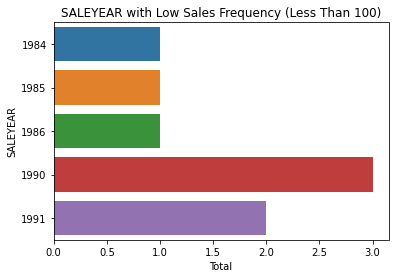

In [321]:
df_saleyear_count = df_dev.groupby('SALEYEAR').count()[['PRICE']].reset_index().rename(columns={'PRICE' : 'Total'})

sns.barplot(data=df_saleyear_count[df_saleyear_count['Total'] < 100], y='SALEYEAR', x='Total', orient='h')
plt.title('SALEYEAR with Low Sales Frequency (Less Than 100)')
plt.show()

As shown in the graph above, there are years with very low sales frequency. They may cause our data to be nonrepresentative if we include the `SALEYEAR` information in our model. Thus, we drop these datapoints.

In [322]:
df_dev.drop(df_dev[df_dev['SALEYEAR'] <= 1991].index, inplace=True)

#### Identifying Outliers in `PRICE`

We found few erroneous data where properties were being sold for a very low price (e.g., USD1.0). It contradicts with the dataset owner's statement in Kaggle which states that property prices are very high in Washington DC, averaging USD647,000 in 2017. There are also properties that are extremely expensive. Thus, we drop data with `PRICE` below or equal to 2.5th percentile and above or equal to 97.5th percentile.

Please note that we drop outliers manually by excluding data that are <= 2.5th percentile or >= 97.5th percentile to assume 95% confidence interval instead of using z-test due to the power of the distribution. Our `PRICE` distribution is extremely right-skewed as such if we use z-test, data that will be considered as outliers are only those with high price while data with very low price (e.g., USD1.0) will still be considered as non-outliers.

In [323]:
df_dev.describe()[['PRICE']]

,PRICE
count,4.559900e+04
mean,5.507326e+05
std,4.720891e+05
min,1.000000e+00
25%,2.399000e+05
50%,4.350000e+05
75%,7.400000e+05
max,2.510000e+07


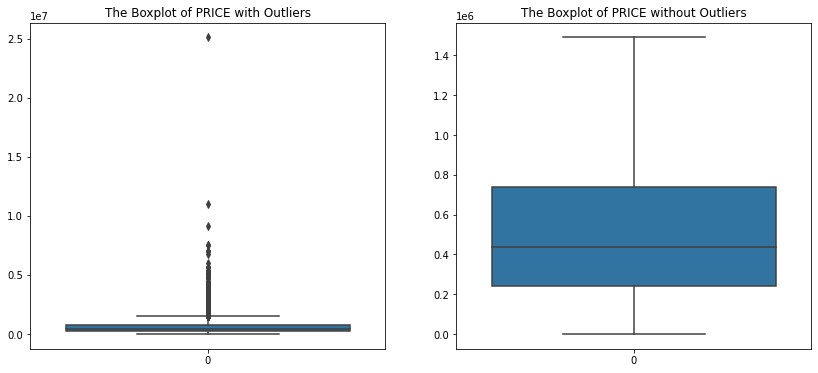

In [324]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

sns.boxplot(data=df_dev['PRICE'], ax=ax[0])
sns.boxplot(data=df_dev['PRICE'], showfliers=False, ax=ax[1])

ax[0].set_title('The Boxplot of PRICE with Outliers')
ax[1].set_title('The Boxplot of PRICE without Outliers')

plt.show()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


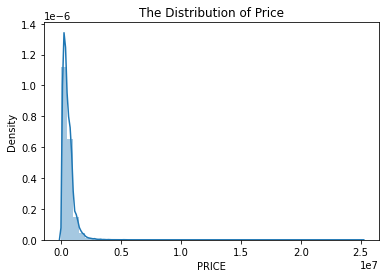

In [325]:
sns.distplot(df_dev['PRICE'])
plt.title('The Distribution of Price')
plt.show()

In [326]:
# Calculating percentile 2.5 in PRICE
p2_5 = np.percentile(df_dev['PRICE'], 2.5)
p2_5

75000.0

In [327]:
# Calculating percentile 97.5 in PRICE
p97_5 = np.percentile(df_dev['PRICE'], 97.5)
p97_5

1676149.999999987

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


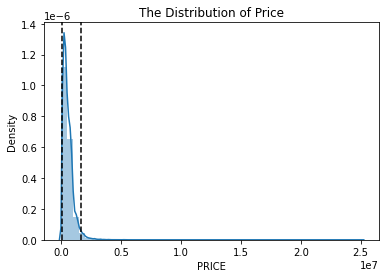

In [328]:
sns.distplot(df_dev['PRICE'])
plt.title('The Distribution of Price')
plt.axvline(p2_5, ls='--', color='black')
plt.axvline(p97_5, ls='--', color='black')
plt.show()

In [329]:
df_dev[df_dev['PRICE'] <= p2_5].shape

(1146, 33)

In [330]:
df_dev[df_dev['PRICE'] >= p97_5].shape

(1140, 33)

In [331]:
# Drop outliers
df_dev.drop(df_dev[df_dev['PRICE'] <= p2_5].index, inplace=True)
df_dev.drop(df_dev[df_dev['PRICE'] >= p97_5].index, inplace=True)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


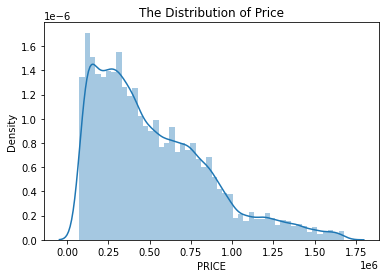

In [332]:
sns.distplot(df_dev['PRICE'])
plt.title('The Distribution of Price')
plt.show()

As we can see the distribution of `PRICE` is not extremely right-skewed as before after the outliers are excluded and it makes sense that the distribution still isn't normally distributed as there are fewer and fewer properties as the price increases. We decide to use median as the measure of the central tendency.

In [333]:
max_price_dev = df_dev['PRICE'].max()
max_price_dev

1676000.0

In [334]:
# Excluding extreme high price in test set since really expensive price is out of our project scope
df_test.drop(df_test[df_test['PRICE'] > max_price_dev].index, inplace=True)

##### With z-test

The following codes are for excluding outliers if we use z-test, however, we do not perform it as explained above.

Reference : https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/

In [241]:
# data = df_dev['PRICE']
# mean = np.mean(data)
# std = np.std(data)
# print('The mean of PRICE is', mean)
# print('The std. deviation is', std)

The mean of PRICE is 550732.5923594816
The std. deviation is 472083.9648633658


##### Calculate z-score

$ Z = \frac {{x} - mean}{std} $

A normal distribution is shown below and it is estimated that :
- 68% of the data points lie between +/- 1 standard deviation
- **95% of the data points lie between +/- 2 standard deviation**
- 99.7% of the data points lie between +/- 3 standard deviation

In [242]:
# # Calculate z-score
# threshold = 1.96 # For 95% confidence interval, approx z* = 2
# outlier = []
# for i in data:
#     z = (i-mean)/std
#     if z > threshold:
#         outlier.append(i)

# len(outliers)

1748

In [ ]:
# # Drop outliers
# df_dev.drop(df_dev[df_dev['PRICE'].isin(outlier)].index, inplace=True)

- Outliers in data that with `EYB before AYB` as it is impossible for a property underwent renovation before even got built.

In [335]:
df_dev.drop(df_dev[df_dev['EYB'] < df_dev['AYB']].index, inplace=True)
df_test.drop(df_test[df_test['EYB'] < df_test['AYB']].index, inplace=True)

#### Merging Values with Very Few Occurance

In [336]:
# Function for categorical column analysis returning a dataframe that contains a grouping result and their occurance count in the data
def check_column(df, column):
    counter = df[column].value_counts().reset_index().rename(columns={'index':column, column:'total'})
    PRICE = df.groupby(column).median()['PRICE'].sort_values().reset_index().reset_index().rename(columns={'PRICE':'median_PRICE'})
    df_new = pd.merge(PRICE, counter, on=column, how='left').drop('index', axis=1)
    return df_new

- In `CNDTN`, there's only 1 property with 'Default' condition, we assume the 'Default' condition to be similar with 'Good' condition since the difference of their median price is not big. We reclassify the 'Default' condition to be 'Good' condition.

In [337]:
check_column(df_dev, 'CNDTN')

,CNDTN,median_PRICE,total
0,Poor,220000.0,54
1,Fair,265881.0,354
2,Average,299000.0,18114
3,Default,499000.0,1
4,Good,551000.0,19587
5,Excellent,601700.0,548
6,Very Good,625000.0,4653


In [338]:
# Dev Set
df_dev['CNDTN'].replace('Default','Good', inplace=True)

In [339]:
# Test set
df_test['CNDTN'].replace('Default','Good', inplace=True)

- In `GRADE`, there are only 2 properties with 'Low Quality' grade, we assume the 'Low Quality' to be similar with 'Fair Quality' since the difference of their median price is not big. We reclassify the 'Low Quality' to be 'Fair Quality'.


In [340]:
check_column(df_dev, 'GRADE')

,GRADE,median_PRICE,total
0,Fair Quality,165000.0,57
1,Low Quality,210000.0,1
2,Average,280000.0,14856
3,Above Average,400000.0,13447
4,Good Quality,682212.5,9204
5,Very Good,855000.0,3789
6,Excellent,981000.0,1167
7,Superior,995000.0,790


In [341]:
# Dev Set
df_dev['GRADE'].replace('Low Quality', 'Fair Quality', inplace=True)

In [342]:
# Test Set
df_test['GRADE'].replace('Low Quality', 'Fair Quality', inplace=True)

- Replace 0 in `SALE_UNITS` with the mode, which is 1.

In [343]:
df_dev['NUM_UNITS'].value_counts()

1.0    36917
2.0     4524
4.0     1386
3.0      444
0.0       35
5.0        3
6.0        2
Name: NUM_UNITS, dtype: int64

In [344]:
# Dev set
df_dev['NUM_UNITS'].replace(0, 1, inplace=True)

In [345]:
# Test set
df_test['NUM_UNITS'].replace(0, 1, inplace=True)

#### Function for Dropping Outliers in each Category

In [346]:
def drop_outliers_ctg(column):
    list_ctg = df_dev[column].unique().tolist()
    upper_fence_ctg = []
    lower_fence_ctg = []

    for i in list_ctg:
        q1 = np.percentile(df_dev[df_dev[column] == i]['PRICE'], 25)
        q3 = np.percentile(df_dev[df_dev[column] == i]['PRICE'], 75)
        iqr = q3 - q1

        upper_fence = q3 + (1.5 * iqr)
        lower_fence = q1 - (1.5 * iqr)

        upper_fence_ctg.append({i:upper_fence})
        lower_fence_ctg.append({i:lower_fence})
        

    for i, j in enumerate(list_ctg):
        df_dev.drop(df_dev[(df_dev[column]==j) & 
                             ((df_dev['PRICE'] > upper_fence_ctg[i][j]) | 
                              (df_dev['PRICE'] < lower_fence_ctg[i][j]))].index, inplace=True, axis=0)
        
    print('The outlier(s) in {} column has successfully been dropped'.format(column))

#### Re-classify Columns

We re-classify the categories of each of the following columns into two categories determined by the median. Category `0` is for categories with median PRICE under the overall median, while category `1` is for categories with median PRICE above the overall median.

In [347]:
PRICE_median = df_dev['PRICE'].median()
PRICE_median

435000.0

In [348]:
# Function for regrouping into 2 groups
# Group 0 : under median
# group 1 : above median

def regroup(df, column):
    df_temp = check_column(df, column)
    df_temp['group'] = df_temp['median_PRICE'].apply(lambda x: 0 if x < PRICE_median else 1)
    list_0 = df_temp[df_temp['group'] == 0][column].unique().tolist()

    df[column] = df[column].apply(lambda x: 0 if x in list_0 else 1)

#### `CNDTN`

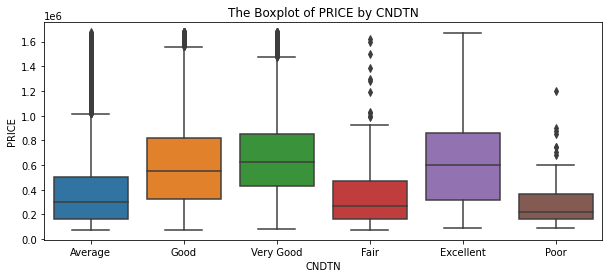

In [349]:
plt.figure(figsize = (10,4))
sns.boxplot(data = df_dev, y = 'PRICE', x = 'CNDTN')
plt.title('The Boxplot of PRICE by CNDTN')
plt.show()

We see that the distribution of `PRICE` between the different `CNDTN` categories differs, though there are some overlap in Fair, Poor, Average categories and in Good, Very Good, Excellent categories, but between 'Fair, Poor, Average' vs 'Good, Very Good, Excellent' they differ quite significantly; as such `CNDTN` still could potentially be a good predictor of price.

##### ANOVA

- F-value = Variance of the group means (Mean Squared Between) / Mean of the within group variances (Mean Squared Error)
- The P value is the probability of getting a result at least as extreme as the one that was actually observed, given that the null hypothesis is true.

In [350]:
# ANOVA
df_group = df_dev[['CNDTN', 'PRICE']].groupby(['CNDTN'])
f_val, p_val = stats.f_oneway(df_group.get_group('Fair')['PRICE'],
                              df_group.get_group('Poor')['PRICE'],
                              df_group.get_group('Average')['PRICE'],
                              df_group.get_group('Good')['PRICE'],
                              df_group.get_group('Very Good')['PRICE'],
                              df_group.get_group('Excellent')['PRICE'])  

print('ANOVA results\nF Value = {}\nP = {}'.format(f_val, p_val))   

ANOVA results
F Value = 1322.431069520156
P = 0.0


This shows a great result, but this does not mean that all six tested groups are all this highly correlated with each other as explained in the boxplot analysis. As a result this may affect to the large F value in our ANOVA result. A P value of 0 implying certain statistical significance.

In [351]:
check_column(df_dev, 'CNDTN')

,CNDTN,median_PRICE,total
0,Poor,220000.0,54
1,Fair,265881.0,354
2,Average,299000.0,18114
3,Good,551000.0,19588
4,Excellent,601700.0,548
5,Very Good,625000.0,4653


In [352]:
# Dev set
regroup(df_dev, 'CNDTN')

In [353]:
# Test set
regroup(df_test, 'CNDTN')

In [354]:
check_column(df_dev, 'CNDTN')

,CNDTN,median_PRICE,total
0,0,296000.0,18522
1,1,573000.0,24789


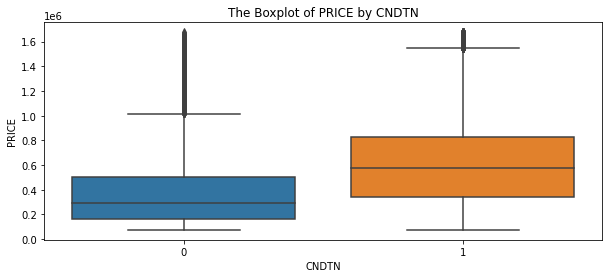

In [355]:
plt.figure(figsize = (10,4))
sns.boxplot(data = df_dev, y = 'PRICE', x = 'CNDTN')
plt.title('The Boxplot of PRICE by CNDTN')
plt.show()

In [356]:
drop_outliers_ctg('CNDTN')

The outlier(s) in CNDTN column has successfully been dropped


#### `STRUCT`

In [357]:
check_column(df_dev, 'STRUCT')

,STRUCT,median_PRICE,total
0,Semi-Detached,275000.0,6107
1,Multi,310500.0,2082
2,Town Inside,349312.5,146
3,Town End,383730.0,61
4,Row End,432090.0,5145
5,Single,489000.0,11266
6,Row Inside,490000.0,17565
7,Default,625000.0,3


In [358]:
# Dev set
regroup(df_dev, 'STRUCT')

In [359]:
# Test set
regroup(df_test, 'STRUCT')

In [360]:
check_column(df_dev, 'STRUCT')

,STRUCT,median_PRICE,total
0,0,325000.0,13541
1,1,490000.0,28834


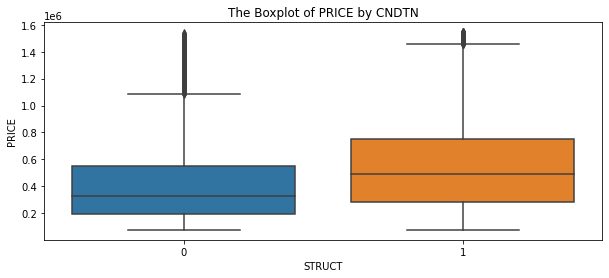

In [361]:
plt.figure(figsize = (10,4))
sns.boxplot(data = df_dev, y = 'PRICE', x = 'STRUCT')
plt.title('The Boxplot of PRICE by CNDTN')
plt.show()

#### `ROOF`

In [362]:
check_column(df_dev, 'ROOF')

,ROOF,median_PRICE,total
0,Concrete,299900.0,1
1,Comp Shingle,359000.0,12051
2,Typical,373750.0,66
3,Built Up,376000.0,13117
4,Composition Ro,410075.0,48
5,Metal- Pre,410749.5,96
6,Shake,480000.0,257
7,Metal- Sms,500000.0,12016
8,Concrete Tile,512500.0,2
9,Water Proof,594000.0,4


In [363]:
# Dev set
regroup(df_dev, 'ROOF')

In [364]:
# Test set
regroup(df_test, 'ROOF')

In [365]:
check_column(df_dev, 'ROOF')

,ROOF,median_PRICE,total
0,0,368060.0,25379
1,1,548888.5,16996


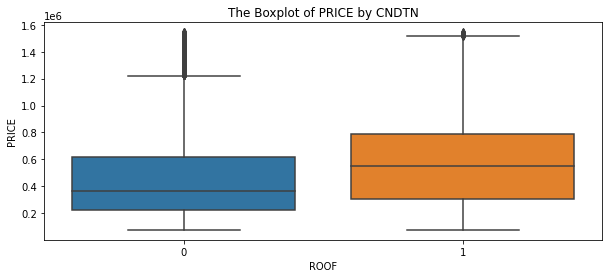

In [366]:
plt.figure(figsize = (10,4))
sns.boxplot(data = df_dev, y = 'PRICE', x = 'ROOF')
plt.title('The Boxplot of PRICE by CNDTN')
plt.show()

#### Creating New Columns

We create the following new columns:
- `ayb_age` : The age of a building by 2018.
- `eyb_age` : The lenght of time (in years) since the last renovation of a building by 2018.

In [367]:
present_year = 2018
# Dev set
df_dev['ayb_age'] = present_year - df_dev['AYB']
df_dev['eyb_age'] = present_year - df_dev['EYB']

# Test set
df_test['ayb_age'] = present_year - df_test['AYB']
df_test['eyb_age'] = present_year - df_test['EYB']

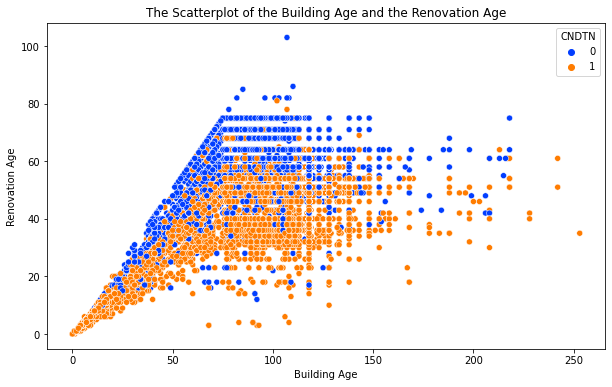

In [368]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='ayb_age' , y='eyb_age', data=df_dev, hue='CNDTN', palette='bright')
plt.title('The Scatterplot of the Building Age and the Renovation Age')
plt.xlabel('Building Age')
plt.ylabel('Renovation Age')
plt.show()

Based on the graph above, we can see the newer a building is, the less likely it is to be renovated recently. But as some buildings get older, some get renovated within recent years, and some do not get renovated recently.

####  Correlations Between Variables

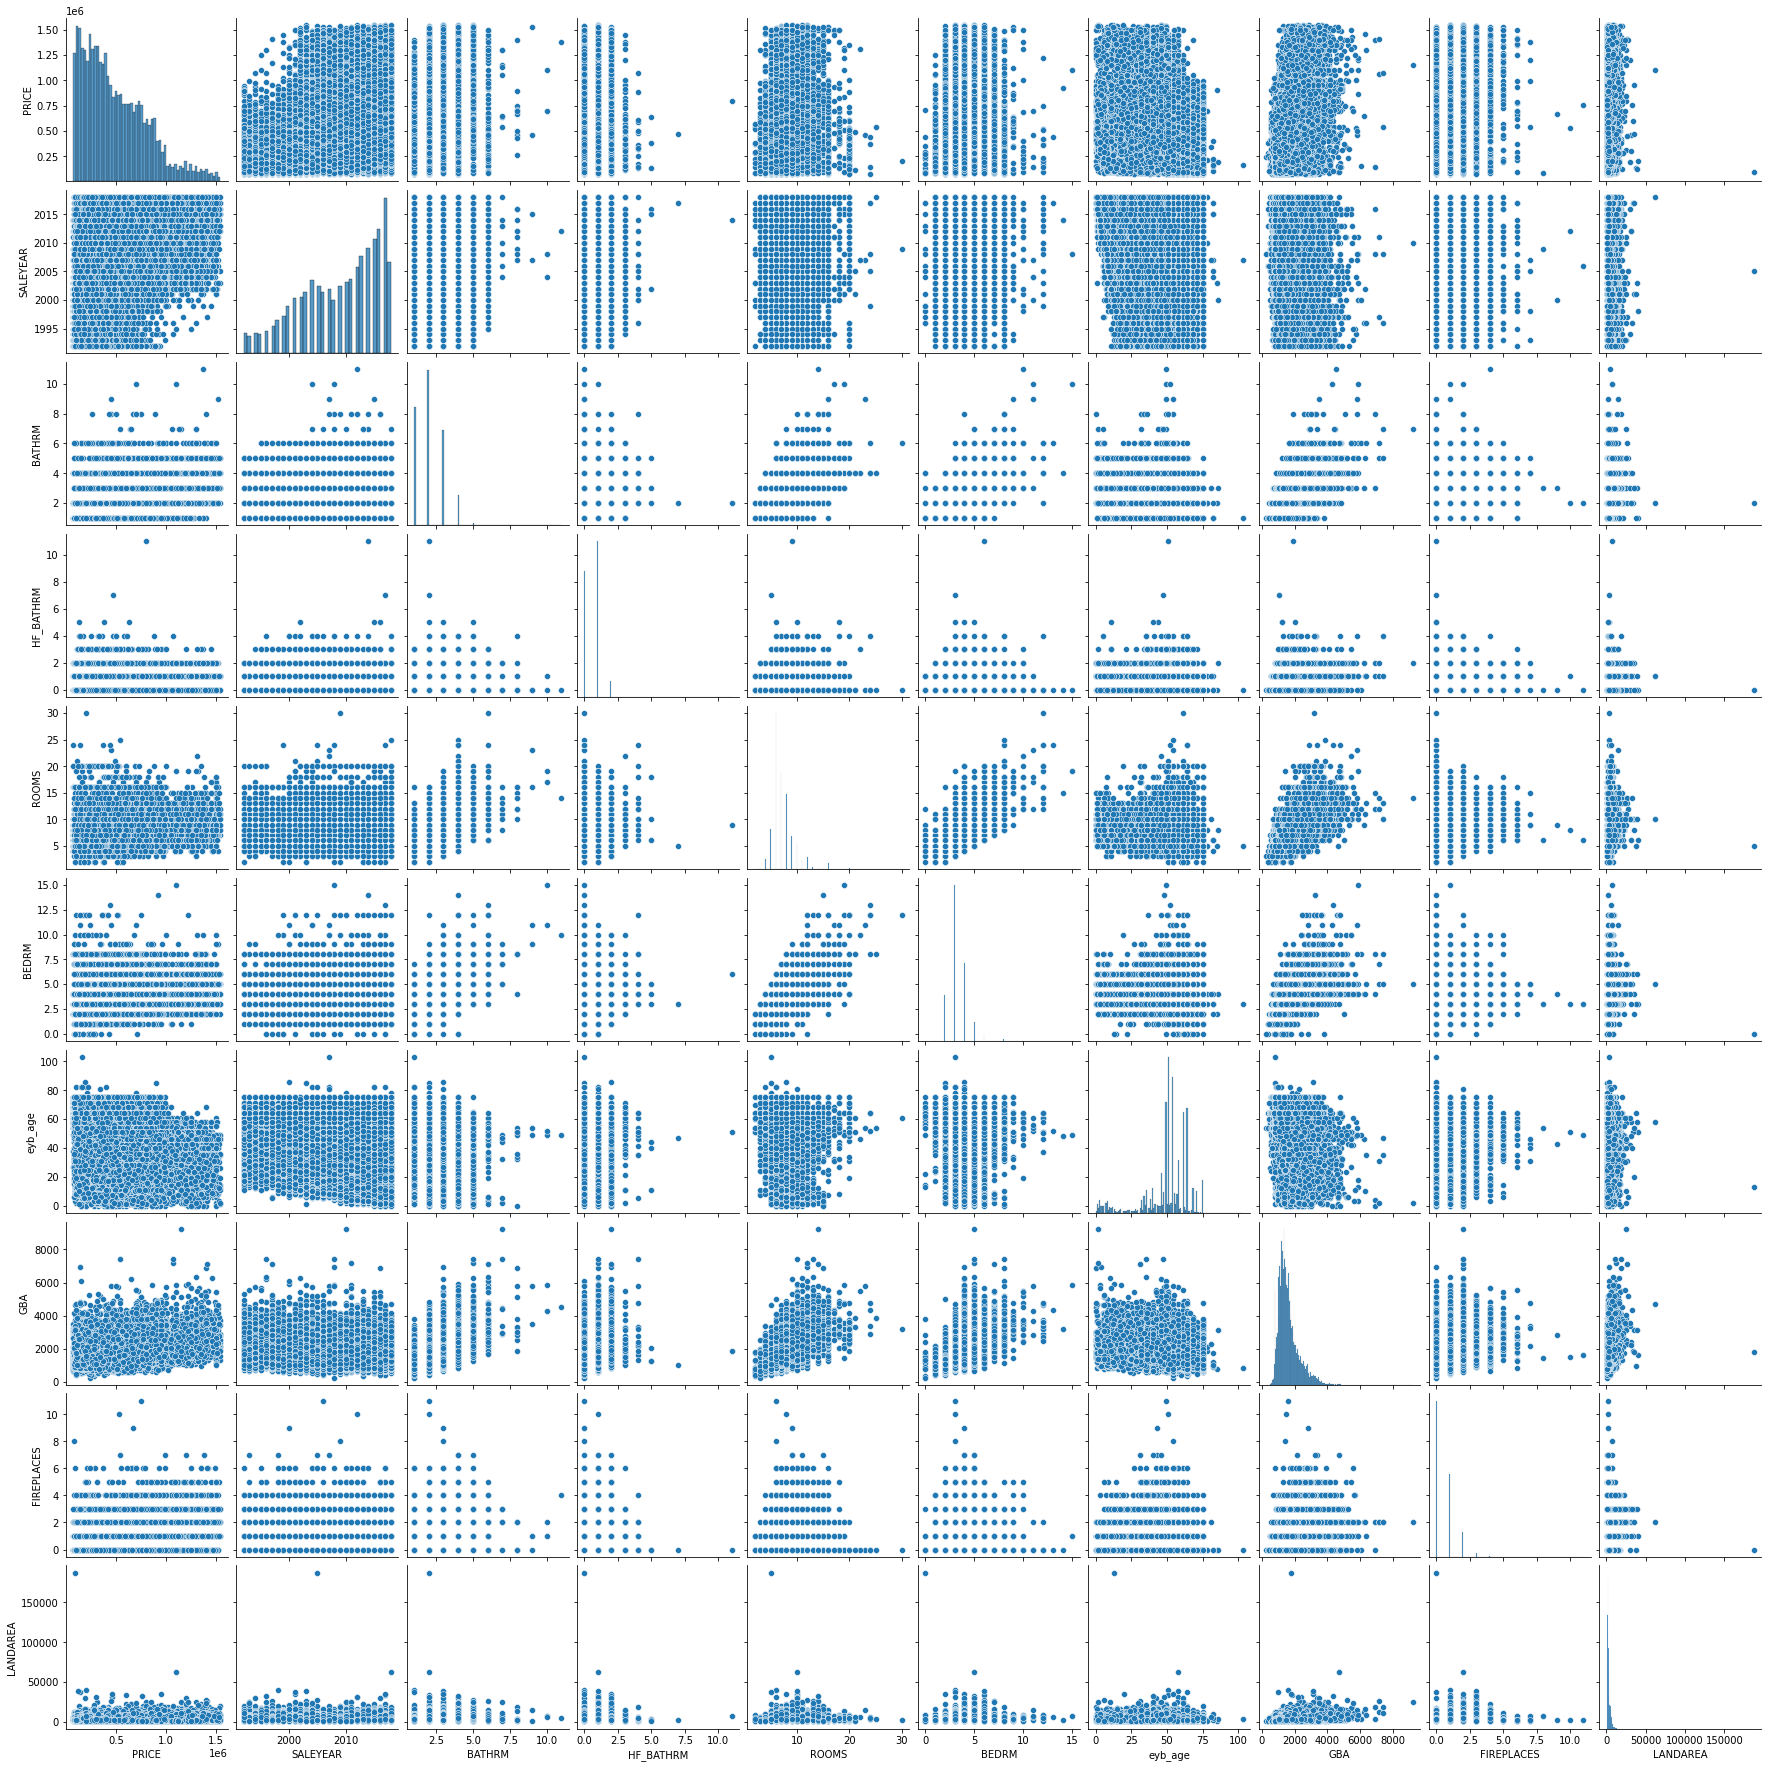

In [369]:
# Visualizing the scatterplot between numerical variables with pairplot
sns.pairplot(df_dev[['PRICE', 'SALEYEAR', 'BATHRM', 'HF_BATHRM', 'ROOMS', 'BEDRM', 'eyb_age','GBA','FIREPLACES','LANDAREA']])
plt.show()

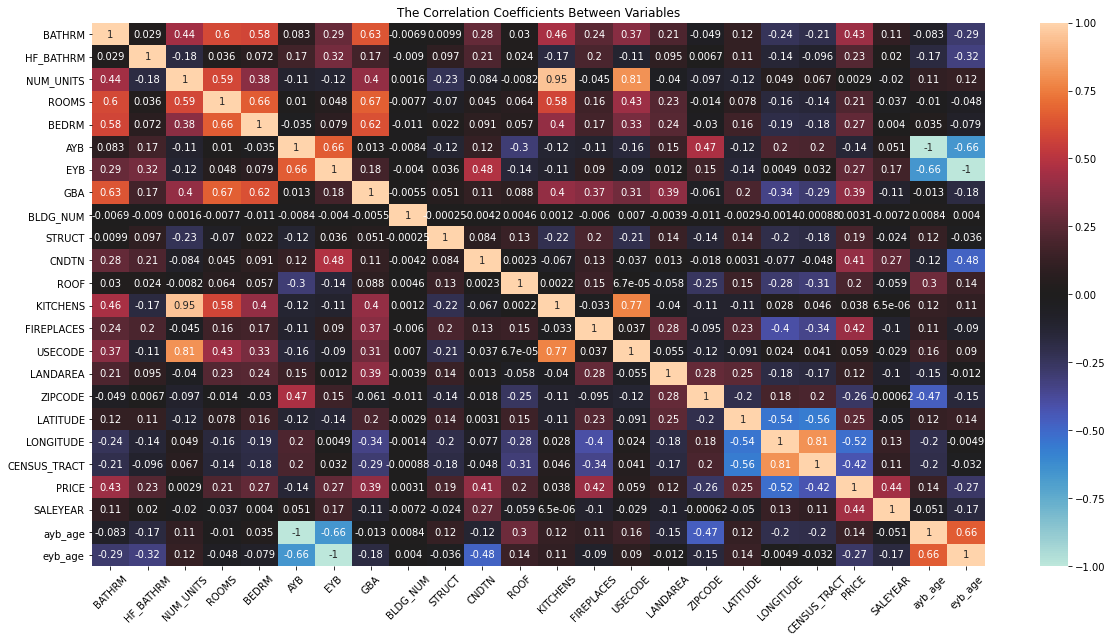

In [370]:
plt.figure(figsize=(20,10))
sns.heatmap(df_dev.corr(), annot=True, center=0)
plt.title('The Correlation Coefficients Between Variables')
plt.xticks(rotation=45)
plt.show()

In order to understand the linear relationship between an <u>individual variable</u> and the price, we can observe the correlation coefficient of each variable with the `PRICE` variable. We conclude there is no strong linear relationship between each individual variable with the price. There are some variables (`BATHRM`, `GBA`, `FIREPLACES`, `SALEYEAR`) which are weak but slightly stronger than the rest.

#### `PRICE` and `USECODE`

In [371]:
df_dev['USECODE'].value_counts()

11    19609
12    11058
13     6029
24     3696
23     1955
15       23
19        5
Name: USECODE, dtype: int64

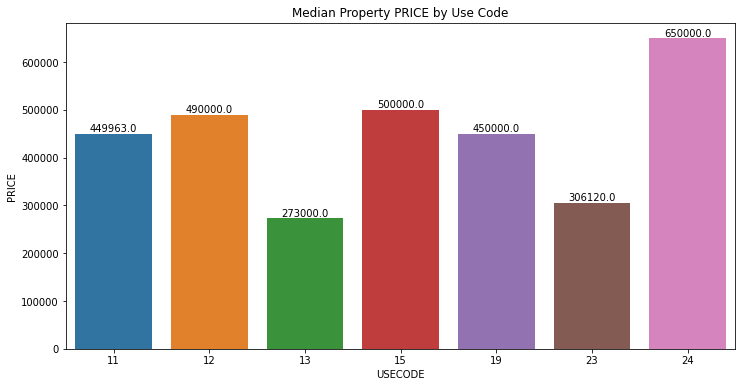

In [372]:
df_usecode = df_dev.groupby(['USECODE']).median()['PRICE'].reset_index()
df_usecode

plt.figure(figsize=(12,6))

bar = sns.barplot(data = df_usecode, x = 'USECODE', y='PRICE')

for index, row in df_usecode.iterrows():
    bar.text(row.name,row.PRICE, round(row.PRICE,1), color='black', ha="center", va = 'bottom')

plt.title('Median Property PRICE by Use Code')
plt.show()

**Use Code Definition**
- 11 : Single family residential home used as such
- 12 : Single family residential home with non-economic 2nd unit
- 13 : Single family residential home with slight commercial/ind
- 15 : Townhouse - Planned Development
- 19 : SFR - Manufactured Home (MH on permanent foundation)
- 23 : Triplex; double or duplex with single family home
- 24 : Four living units; e.g. fourplex or triplex w/SFR

Reference : https://www.acgov.org/MS/prop/useCodeList.aspx#0

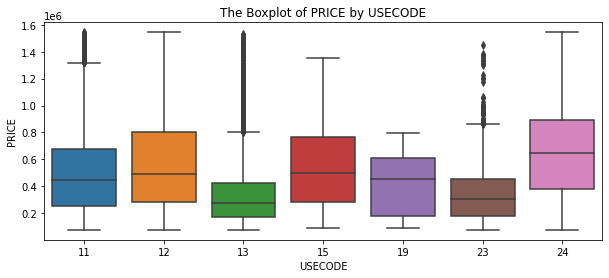

In [373]:
plt.figure(figsize = (10,4))
sns.boxplot(data = df_dev, y = 'PRICE', x = 'USECODE')
plt.title('The Boxplot of PRICE by USECODE')
plt.show()

We see that the distribution of `PRICE` between the different `USECODE` categories differs, though there are some overlap in some categories; as such `USECODE` still could potentially be a good predictor of price.

In [374]:
# ANOVA
df_group = df_dev[['USECODE', 'PRICE']].groupby(['USECODE'])
f_val, p_val = stats.f_oneway(df_group.get_group(11)['PRICE'],
                              df_group.get_group(12)['PRICE'],
                              df_group.get_group(13)['PRICE'],
                              df_group.get_group(15)['PRICE'],
                              df_group.get_group(19)['PRICE'],
                              df_group.get_group(23)['PRICE'],
                              df_group.get_group(24)['PRICE'])  

 
print('ANOVA results\nF Value = {}\nP = {}'.format(f_val, p_val))   

ANOVA results
F Value = 606.2776633493135
P = 0.0


This shows a great result, but this does not mean that all seven tested groups are all this highly correlated with each other as explained in the boxplot analysis. As a result this may affect to the large F value in our ANOVA result. A P value of 0 implying certain statistical significance.

#### `PRICE` and `GRADE`

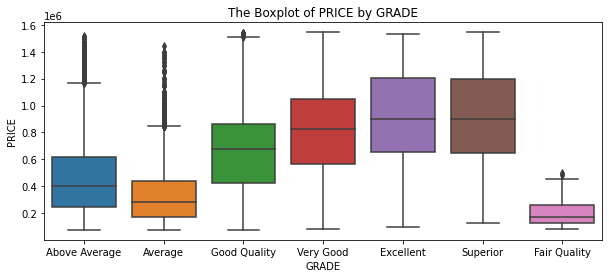

In [375]:
plt.figure(figsize = (10,4))
sns.boxplot(data = df_dev, y = 'PRICE', x = 'GRADE')
plt.title('The Boxplot of PRICE by GRADE')
plt.show()

We see that the distribution of `PRICE` between the different `GRADE` categories differs; as such `GRADE` could potentially be a good predictor of price.

In [376]:
# ANOVA
df_group = df_dev[['GRADE', 'PRICE']].groupby(['GRADE'])
f_val, p_val = stats.f_oneway(df_group.get_group('Fair Quality')['PRICE'],
                              df_group.get_group('Average')['PRICE'],
                              df_group.get_group('Above Average')['PRICE'],
                              df_group.get_group('Good Quality')['PRICE'],
                              df_group.get_group('Very Good')['PRICE'],
                              df_group.get_group('Excellent')['PRICE'],
                              df_group.get_group('Superior')['PRICE'])  

 
print('ANOVA results\nF Value = {}\nP = {}'.format(f_val, p_val))   

ANOVA results
F Value = 3274.4925561769805
P = 0.0


This is a great result, with a large F value showing a strong correlation (there is a large difference between the means of the groups compared to the variability of the observations within the groups) and a P value of 0 implying certain statistical significance.

In [377]:
drop_outliers_ctg('GRADE')

The outlier(s) in GRADE column has successfully been dropped


#### `PRICE` vs `QUALIFIED`

In [378]:
df_dev.QUALIFIED.value_counts()

Q    33577
U     8395
Name: QUALIFIED, dtype: int64

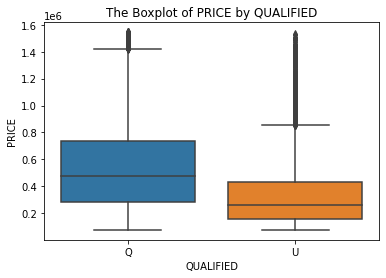

In [379]:
sns.boxplot(data = df_dev, y = 'PRICE', x = 'QUALIFIED')
plt.title('The Boxplot of PRICE by QUALIFIED')
plt.show()

We see that the distribution of `PRICE` between the different `QUALIFIED` categories differs, where 'Unqualified' has lower median than 'Qualified'; as such `QUALIFIED` could potentially be a good predictor of price.

In [380]:
# ANOVA
df_group = df_dev[['QUALIFIED', 'PRICE']].groupby(['QUALIFIED'])

f_val, p_val = stats.f_oneway(df_group.get_group('Q')['PRICE'],
                              df_group.get_group('U')['PRICE'])  
 
print('ANOVA results\nF test score = {}\nP = {}'.format(f_val, p_val))   

ANOVA results
F test score = 2872.2299070195813
P = 0.0


This is a great result, with a large F value showing a strong correlation (there is a large difference between the means of the groups compared to the variability of the observations within the groups) and a P value of 0 implying certain statistical significance.

#### `PRICE` vs `WARD`

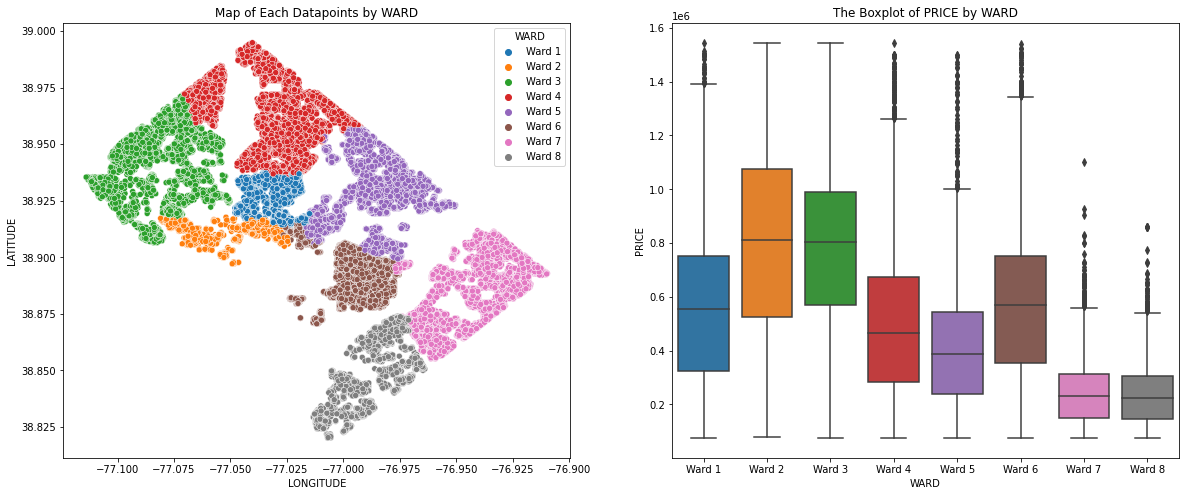

In [381]:
fig, ax = plt.subplots(1,2, figsize = (20,8))

ward_order = ['Ward 1','Ward 2','Ward 3','Ward 4','Ward 5','Ward 6','Ward 7','Ward 8']

ax1 = sns.scatterplot(
    data = df_dev, x='LONGITUDE', y='LATITUDE', hue = 'WARD',        
    hue_order = ward_order, ax = ax[0])
ax2 = sns.boxplot(
    data = df_dev, y = 'PRICE', x = 'WARD',order = ward_order, ax = ax[1])

ax[0].set_title('Map of Each Datapoints by WARD')
ax[1].set_title('The Boxplot of PRICE by WARD')

plt.show()

We see that the distribution of `PRICE` between the different `WARD` categories differs; as such `WARD` could potentially be a good predictor of price.

In [382]:
# ANOVA
df_group = df_dev[['WARD', 'PRICE']].groupby(['WARD'])

f_val, p_val = stats.f_oneway(df_group.get_group('Ward 1')['PRICE'],
                              df_group.get_group('Ward 2')['PRICE'],
                              df_group.get_group('Ward 3')['PRICE'],
                              df_group.get_group('Ward 4')['PRICE'],
                              df_group.get_group('Ward 5')['PRICE'],
                              df_group.get_group('Ward 6')['PRICE'],
                              df_group.get_group('Ward 7')['PRICE'],
                              df_group.get_group('Ward 8')['PRICE'])  
 
print('ANOVA results\nF test score = {}\nP = {}'.format(f_val, p_val))   

ANOVA results
F test score = 2895.1231153832014
P = 0.0


This is a great result, with a large F value showing a strong correlation (there is a large difference between the means of the groups compared to the variability of the observations within the groups) and a P value of 0 implying certain statistical significance.

#### `PRICE` vs `QUADRANT`

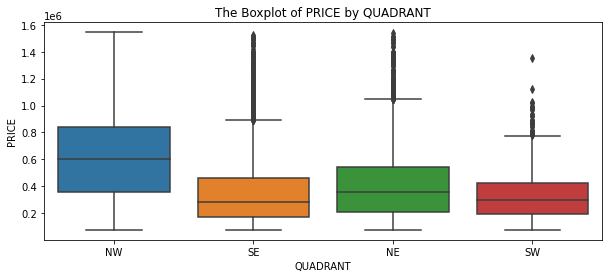

In [383]:
plt.figure(figsize = (10,4))
sns.boxplot(data = df_dev, y = 'PRICE', x = 'QUADRANT')
plt.title('The Boxplot of PRICE by QUADRANT')
plt.show()

We see that the distribution of `PRICE` between the different `QUADRANT` categories have a significant overlap, so `QUADRANT` would probably only give little contribution in determining the price.

In [384]:
# ANOVA
df_group = df_dev[['QUADRANT', 'PRICE']].groupby(['QUADRANT'])

f_val, p_val = stats.f_oneway(df_group.get_group('NW')['PRICE'],
                              df_group.get_group('SW')['PRICE'],
                              df_group.get_group('SE')['PRICE'],
                              df_group.get_group('NE')['PRICE'])  
 
print('ANOVA results\nF test score = {}\nP = {}'.format(f_val, p_val))   

ANOVA results
F test score = 2522.052821120607
P = 0.0


This shows a great result, but this does not mean that all four tested groups are all this highly correlated. In the boxplot we see that some categories have a significant overlap, but there is also a category that is significantly different from the others, as a result this may affect to the large F value in our ANOVA result. A P value of 0 implying certain statistical significance.

### Insights

#### Map by Ward

In [385]:
df_group_price_ward = df_dev[['WARD', 'PRICE']].groupby(['WARD']).median().reset_index()

In [386]:
# Geojson file
import json
with open('../Data/ward-2012.geojson' ,'r') as f:
    DC_geo = json.load(f)

# create a plain world map at Washington DC Coordinates
world_map = folium.Map(location=[38.9, -77.05], zoom_start=11.5)

Geojson Source : https://opendata.dc.gov/datasets/ward-from-2012

In [387]:
# Marking the ward in folium map

def marking(long, lat, name):
    folium.map.Marker(
        [long, lat],
        icon=DivIcon(
            icon_size=(80,30),
            icon_anchor=(0,0),
            html='<div style="font-size: 10pt">{}</div>'.format(name),
            )
        ).add_to(world_map)  

marking(38.93, -77.042, 'WARD 1')
marking(38.9, -77.05, 'WARD 2')
marking(38.94, -77.09, 'WARD 3')
marking(38.96, -77.034, 'WARD 4')
marking(38.93, -76.99, 'WARD 5')
marking(38.89, -77, 'WARD 6')
marking(38.89, -76.95, ' WARD 7')    
marking(38.845, -77.02, 'WARD 8')

In [388]:
# Defining threshold
threshold_scale = np.linspace(df_group_price_ward['PRICE'].min(),
                              df_group_price_ward['PRICE'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum price

# Choropleth map
world_map.choropleth(
    geo_data=DC_geo,
    data=df_group_price_ward,
    columns=['WARD','PRICE'],
    key_on='feature.properties.NAME',
    fill_color='BuPu', 
    threshold_scale = threshold_scale,
    fill_opacity=0.7, 
    line_opacity=0.2)

C:\anaconda\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


Below is a Choropleth map of the Washington DC, USA depicting the median property price by Ward (Ward 1-8). Ward 2 & 3 have the highest median price, while Ward 7 & 8 have the lowest median price.

In [389]:
world_map

#### Median Price by Ward & Number of Property by Ward

- Properties located in Ward 2 & 3 have the highest median price of around USD800,000. Whereas properties located in Ward 7 & 8 have the lowest median price of around USD220,000.
- Ward 4, 5, and 6 are possibly the most densely populated area based on the number of properties located in those wards. Whereas Ward 2 is possibly considered as an elite residential area considering the high median price and the low number of properties.

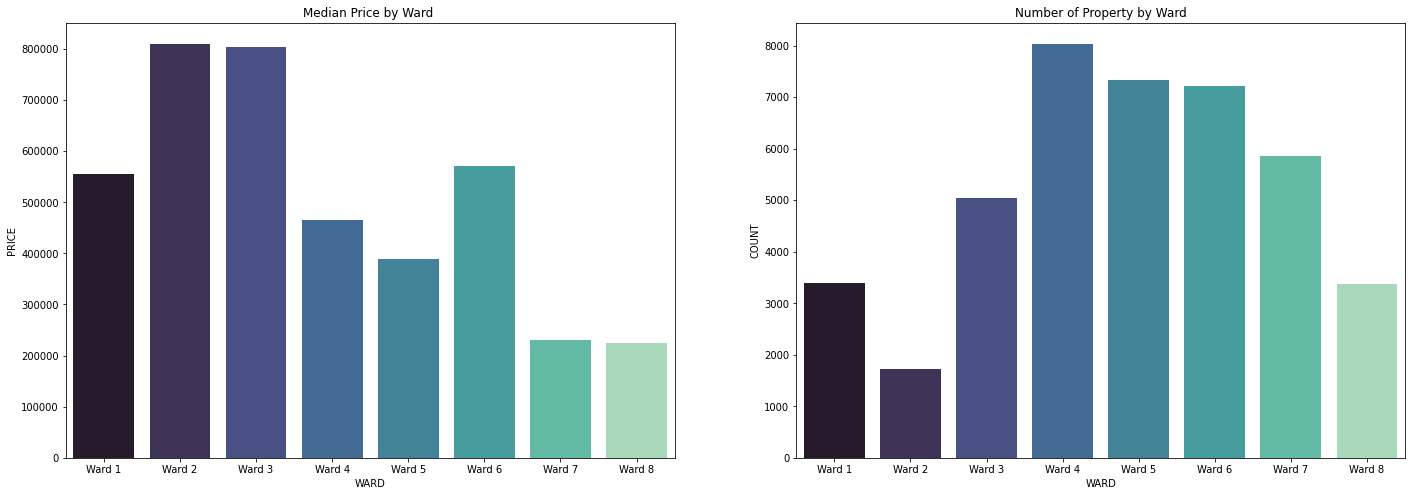

In [390]:
df_group_grade_count = df_dev.groupby('WARD')[['PRICE']].count().reset_index().rename(columns={'PRICE':'COUNT'})

fig,ax = plt.subplots(1,2,figsize = (24,8))

sns.barplot(x = 'WARD', y = 'PRICE', data = df_group_price_ward, ax = ax[0], palette = 'mako')
sns.barplot(x = 'WARD', y = 'COUNT', data = df_group_grade_count, ax = ax[1], palette = 'mako')

ax[0].set_title('Median Price by Ward ')
ax[1].set_title('Number of Property by Ward')

plt.show()

#### Sale per Year

The median property selling price in Washington DC, USA has an overall upward trend since 1992 until 2018. However, in 2008 - 2009 the price went down due to the global financial crisis and the <a href="https://www.investopedia.com/articles/economics/09/subprime-market-2008.asp">housing crash</a>.

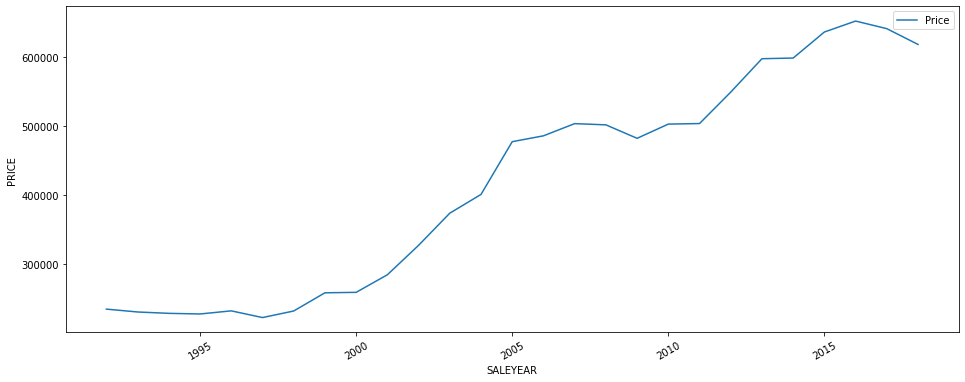

In [391]:
df_saleyear = df_dev.groupby('SALEYEAR').mean()[['PRICE']].reset_index()

plt.figure(figsize = (16,6))

sns.lineplot(data = df_saleyear,x = 'SALEYEAR', y = 'PRICE', label = 'Price')
         
plt.xticks(rotation = 30)
plt.show()

#### Median Price by Grade & Number of Property by Grade

In [392]:
df_group_grade_med = df_dev.groupby('GRADE')[['PRICE']].median().reset_index()
df_group_grade_count = df_dev.groupby('GRADE')[['PRICE']].count().reset_index().rename(columns={'PRICE':'COUNT'})

df_group_grade_med['Orders'] = [2,1,5,0,3,6,4]
df_group_grade_count['Orders'] = [2,1,5,0,3,6,4]

df_group_grade_med.sort_values(by='Orders', inplace=True)
df_group_grade_count.sort_values(by='Orders', inplace=True)

- The grade of a property shows a linear correlation with the median price. The better the grade of a property is, the higher the price.

- Most of properties in Washington DC, USA are classified as 'Average' and 'Above Average' by appraisers. There are also very few properties that are classified as 'Fair Quality'.

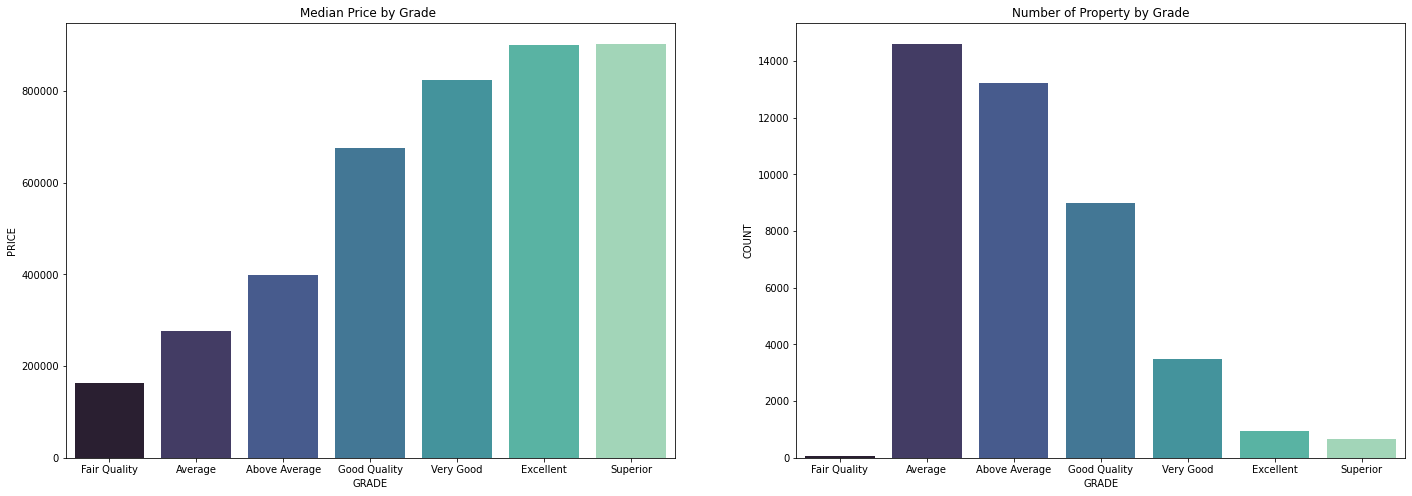

In [393]:
fig,ax = plt.subplots(1,2,figsize = (24,8))

sns.barplot(x = 'GRADE', y = 'PRICE', data = df_group_grade_med, ax = ax[0], palette = 'mako')
sns.barplot(x = 'GRADE', y = 'COUNT', data = df_group_grade_count, ax = ax[1], palette = 'mako')

ax[0].set_title('Median Price by Grade ')
ax[1].set_title('Number of Property by Grade')

plt.show()

#### Median Price by Use Code & Number of Property by Use Code

In [394]:
df_group_usecode_med = df_dev.groupby('USECODE')[['PRICE']].median().reset_index()
df_group_usecode_count = df_dev.groupby('USECODE')[['PRICE']].count().reset_index().rename(columns={'PRICE':'COUNT'})

- Based on the property use code, Four Living Units have the highest median price followed by Town House and Single Family Residential.
- Most properties in Washington DC, USA are Single Family Residential. There are very few Townhouse and SFR properties.

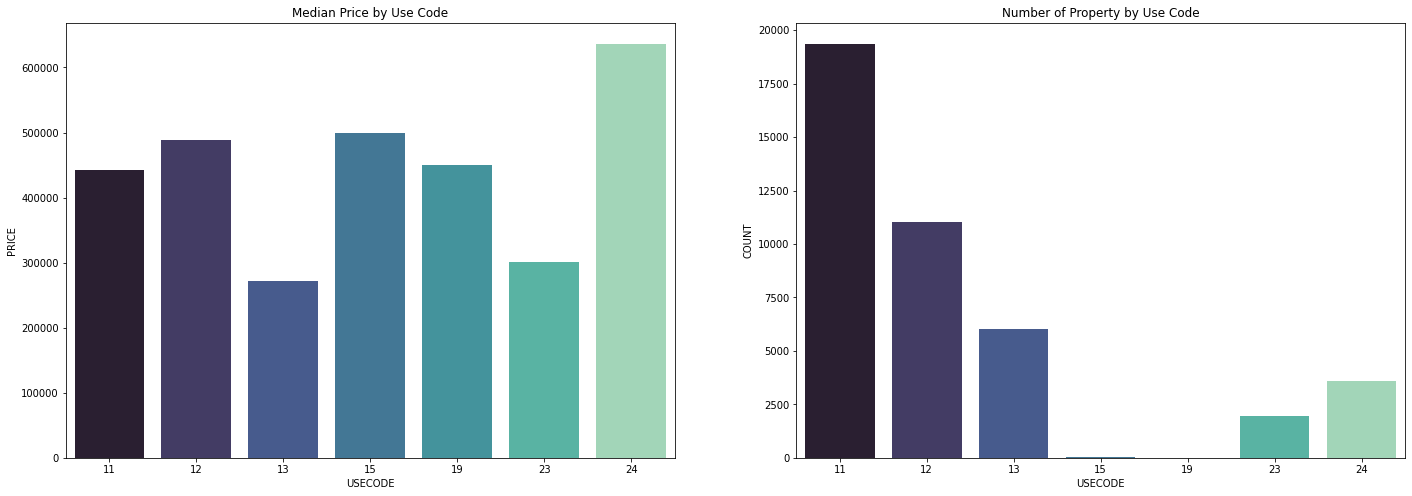

In [395]:
fig,ax = plt.subplots(1,2,figsize = (24,8))

sns.barplot(x = 'USECODE', y = 'PRICE', data = df_group_usecode_med, ax = ax[0], palette = 'mako')
sns.barplot(x = 'USECODE', y = 'COUNT', data = df_group_usecode_count, ax = ax[1], palette = 'mako')

ax[0].set_title('Median Price by Use Code')
ax[1].set_title('Number of Property by Use Code')

plt.show()

**Remarks**
- 11 : Single family residential homes used as such
- 12 : Single family res home with non-economic 2nd unit
- 13 : Single Family Res home with slight commercial/ind
- 15 : Townhouse - Planned Development
- 19 : SFR - Manufactured Home (MH on permanent foundation)
- 23 : Triplex; double or duplex with single family home
- 24 : Four living units; e.g. fourplex or triplex w/SFR

In [396]:
#Export clean dev set for analysis to csv
df_dev.to_csv('../Data/DF_Residential_Analysis.csv', index=False)

# III. Data Preparation

## Encoding the Ordinal Feature

In [397]:
grade_encode = {
    'Fair Quality' : 0,
    'Average' : 1,
    'Above Average' : 2,
    'Good Quality' : 3,
    'Very Good' : 4,
    'Excellent' : 5,
    'Superior' : 6
}

df_dev['GRADE'] = df_dev['GRADE'].apply(lambda x: grade_encode[x])
df_test['GRADE'] = df_test['GRADE'].apply(lambda x: grade_encode[x])

In [398]:
df_dev.shape

(41972, 35)

In [399]:
df_test.shape

(11145, 35)

In [400]:
#Export clean dev (train) & test set for modeling to csv
df_dev.to_csv('../Data/DF_Train.csv', index=False)
df_test.to_csv('../Data/DF_Test.csv', index=False)